Importing libraries

In [66]:
import os
os.environ['TF_USE_LEGACY_KERAS'] = 'True'

In [103]:

import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

Data Preprocessing

Training Image preprocessing

In [104]:
#image data

training_set = tf.keras.utils.image_dataset_from_directory(
    'train',   #train is the directory name
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,   #default size
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 5658 files belonging to 3 classes.


# Validation Image Preprocessing

In [105]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 1068 files belonging to 3 classes.


To avoid Overshooting Loss function

1.Choose small learning rate default 0.001 here we have taken 0.0001 

2.There may be chance of underfitting so increase number of neuron

3.Add more Convolutional Layer to extract more feature from images there may be possibilty that model unable to capture relevant feature or model is confusing due to lack of feature so feed with more feature

# Building Model

In [106]:
#cnn used in text ,deal with image dataset and train model to classify
#process:1.input image-->convolutions-->pooling-->fully connected-->output
# cnn = tf.keras.models.Sequential()
from tensorflow.keras.layers import Dense,Conv2D, MaxPool2D,Flatten
from tensorflow.keras.models import Sequential

In [107]:
model = Sequential()

In [125]:
##Building convolution layer

#convolutions and max pooling is done             

model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

ValueError: Input 0 of layer "conv2d_52" is incompatible with the layer: expected min_ndim=4, found ndim=2. Full shape received: (None, 3)

In [124]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))           2
model.add(MaxPool2D(pool_size=2,strides=2))

ValueError: Input 0 of layer "conv2d_52" is incompatible with the layer: expected min_ndim=4, found ndim=2. Full shape received: (None, 3)

In [132]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))             
model.add(MaxPool2D(pool_size=2,strides=2))

ValueError: Input 0 of layer "conv2d_52" is incompatible with the layer: expected min_ndim=4, found ndim=2. Full shape received: (None, 3)

In [133]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))                              

ValueError: Input 0 of layer "conv2d_52" is incompatible with the layer: expected min_ndim=4, found ndim=2. Full shape received: (None, 3)

In [134]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))            
model.add(MaxPool2D(pool_size=2,strides=2))

ValueError: Input 0 of layer "conv2d_52" is incompatible with the layer: expected min_ndim=4, found ndim=2. Full shape received: (None, 3)

In [113]:
# cnn.add(tf.keras.layers.Dropout(0.25))
model.add(Flatten())

In [114]:
# #flatting process
# cnn.add(tf.keras.layers.Flatten())
model.add(Dense(units=1024,activation='relu'))



In [115]:
# cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))
model.add(Dense(units=3,activation='softmax'))

In [127]:
#model.add(tf.keras.layers.Dropout(0.4)) #To avoid overfitting

In [117]:
#Output Layer
# cnn.add(tf.keras.layers.Dense(units=38,activation='softmax')) #AF as softmax bcoz want ans in probability format

# Compiling and Training Phase

In [118]:
# optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])



In [119]:
#  cnn.compile(optimizer=tf.keras.optimizers.Adam(
#     learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])



In [120]:

model.summary()


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_42 (Conv2D)                   │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_43 (Conv2D)                   │ (None, 126, 126, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_21 (MaxPooling2D)      │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_44 (Conv2D)                   │ (None, 63, 63, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_45 (Conv2D)                   │ (None, 61, 61, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_22 (MaxPooling2D)      │ (None, 30, 30, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_46 (Conv2D)                   │ (None, 30, 30, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_47 (Conv2D)                   │ (None, 28, 28, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_23 (MaxPooling2D)      │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_48 (Conv2D)                   │ (None, 14, 14, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_49 (Conv2D)                   │ (None, 12, 12, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_24 (MaxPooling2D)      │ (None, 6, 6, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_50 (Conv2D)                   │ (None, 6, 6, 32)            │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_51 (Conv2D)                   │ (None, 4, 4, 32)            │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_25 (MaxPooling2D)      │ (None, 2, 2, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1024)                │         132,096 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 3)                   │           3,075 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 219,299 (856.64 KB)

 Trainable params: 219,299 (856.64 KB)

 Non-trainable params: 0 (0.00 B)

In [122]:
training_history = model.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
177/177 ━━━━━━━━━━━━━━━━━━━━ 90s 510ms/step - accuracy: 0.9154 - loss: 0.2061 - val_accuracy: 0.5187 - val_loss: 2.7475
Epoch 2/10
177/177 ━━━━━━━━━━━━━━━━━━━━ 86s 486ms/step - accuracy: 0.9569 - loss: 0.1241 - val_accuracy: 0.5646 - val_loss: 2.3103
Epoch 3/10
177/177 ━━━━━━━━━━━━━━━━━━━━ 87s 488ms/step - accuracy: 0.9742 - loss: 0.0718 - val_accuracy: 0.5169 - val_loss: 3.4289
Epoch 4/10
177/177 ━━━━━━━━━━━━━━━━━━━━ 88s 497ms/step - accuracy: 0.9740 - loss: 0.0754 - val_accuracy: 0.5403 - val_loss: 3.5699
Epoch 5/10
177/177 ━━━━━━━━━━━━━━━━━━━━ 87s 492ms/step - accuracy: 0.9786 - loss: 0.0603 - val_accuracy: 0.5131 - val_loss: 4.5984
Epoch 6/10
177/177 ━━━━━━━━━━━━━━━━━━━━ 86s 485ms/step - accuracy: 0.9773 - loss: 0.0572 - val_accuracy: 0.5103 - val_loss: 4.9965
Epoch 7/10
177/177 ━━━━━━━━━━━━━━━━━━━━ 86s 487ms/step - accuracy: 0.9716 - loss: 0.0895 - val_accuracy: 0.5009 - val_loss: 5.3894
Epoch 8/10
177/177 ━━━━━━━━━━━━━━━━━━━━ 87s 494ms/step - accuracy: 0.9789 - loss: 0


# Evaluating Model

In [128]:
#Training set Accuracy
train_loss, train_acc = model.evaluate(training_set)
print('Training accuracy:', train_acc)

177/177 ━━━━━━━━━━━━━━━━━━━━ 24s 133ms/step - accuracy: 0.9914 - loss: 0.0329
Training accuracy: 0.9915164113044739


In [130]:
#Validation set Accuracy
val_loss, val_acc = model.evaluate(validation_set)
print('Validation accuracy:', val_acc)

34/34 ━━━━━━━━━━━━━━━━━━━━ 5s 137ms/step - accuracy: 0.4842 - loss: 5.0209
Validation accuracy: 0.4915730357170105


# Saving Model

In [137]:
model.save('trained_plant_disease_model.keras')

In [136]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

# Define the model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=(128, 128, 3)))
model.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(3, activation='softmax'))  # Output layer with 3 neurons for 3 classes

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])



In [138]:
training_history.history #Return Dictionary of history

{'accuracy': [0.93389892578125,
  0.9602332711219788,
  0.9724284410476685,
  0.9743725657463074,
  0.9810886979103088,
  0.9754329919815063,
  0.9763166904449463,
  0.9734888672828674,
  0.9787911176681519,
  0.9848002791404724],
 'loss': [0.1669921725988388,
  0.11349519342184067,
  0.07981336116790771,
  0.07620365917682648,
  0.0558319054543972,
  0.06316837668418884,
  0.06911619007587433,
  0.08848711103200912,
  0.06419078260660172,
  0.04857955500483513],
 'val_accuracy': [0.5187265872955322,
  0.5646067261695862,
  0.516853928565979,
  0.5402621626853943,
  0.5131086111068726,
  0.5102996230125427,
  0.5009363293647766,
  0.5187265872955322,
  0.49438202381134033,
  0.4915730357170105],
 'val_loss': [2.747509479522705,
  2.3103346824645996,
  3.4289023876190186,
  3.569888114929199,
  4.598373889923096,
  4.996538162231445,
  5.389389514923096,
  3.970452070236206,
  6.262151718139648,
  4.9313459396362305]}

In [139]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [140]:
print(training_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


# Accuracy Visualization

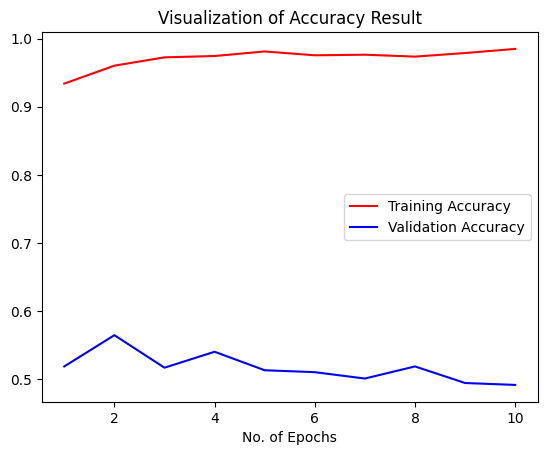

In [141]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

# Some other metrics for model evaluation

In [142]:
class_name = validation_set.class_names

In [143]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 1068 files belonging to 3 classes.


In [144]:
y_pred = model.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

1068/1068 ━━━━━━━━━━━━━━━━━━━━ 17s 16ms/step


In [145]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [146]:
Y_true

<tf.Tensor: shape=(1068,), dtype=int64, numpy=array([0, 0, 0, ..., 2, 2, 2], dtype=int64)>

In [147]:
predicted_categories

<tf.Tensor: shape=(1068,), dtype=int64, numpy=array([0, 1, 1, ..., 1, 0, 0], dtype=int64)>

In [148]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [149]:
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                          precision    recall  f1-score   support

      Apple___Apple_scab       0.45      0.74      0.56       504
       Apple___Black_rot       0.39      0.18      0.25       497
Apple___Cedar_apple_rust       0.00      0.00      0.00        67

                accuracy                           0.43      1068
               macro avg       0.28      0.31      0.27      1068
            weighted avg       0.39      0.43      0.38      1068



C:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

# Confusion Matrix Visualization

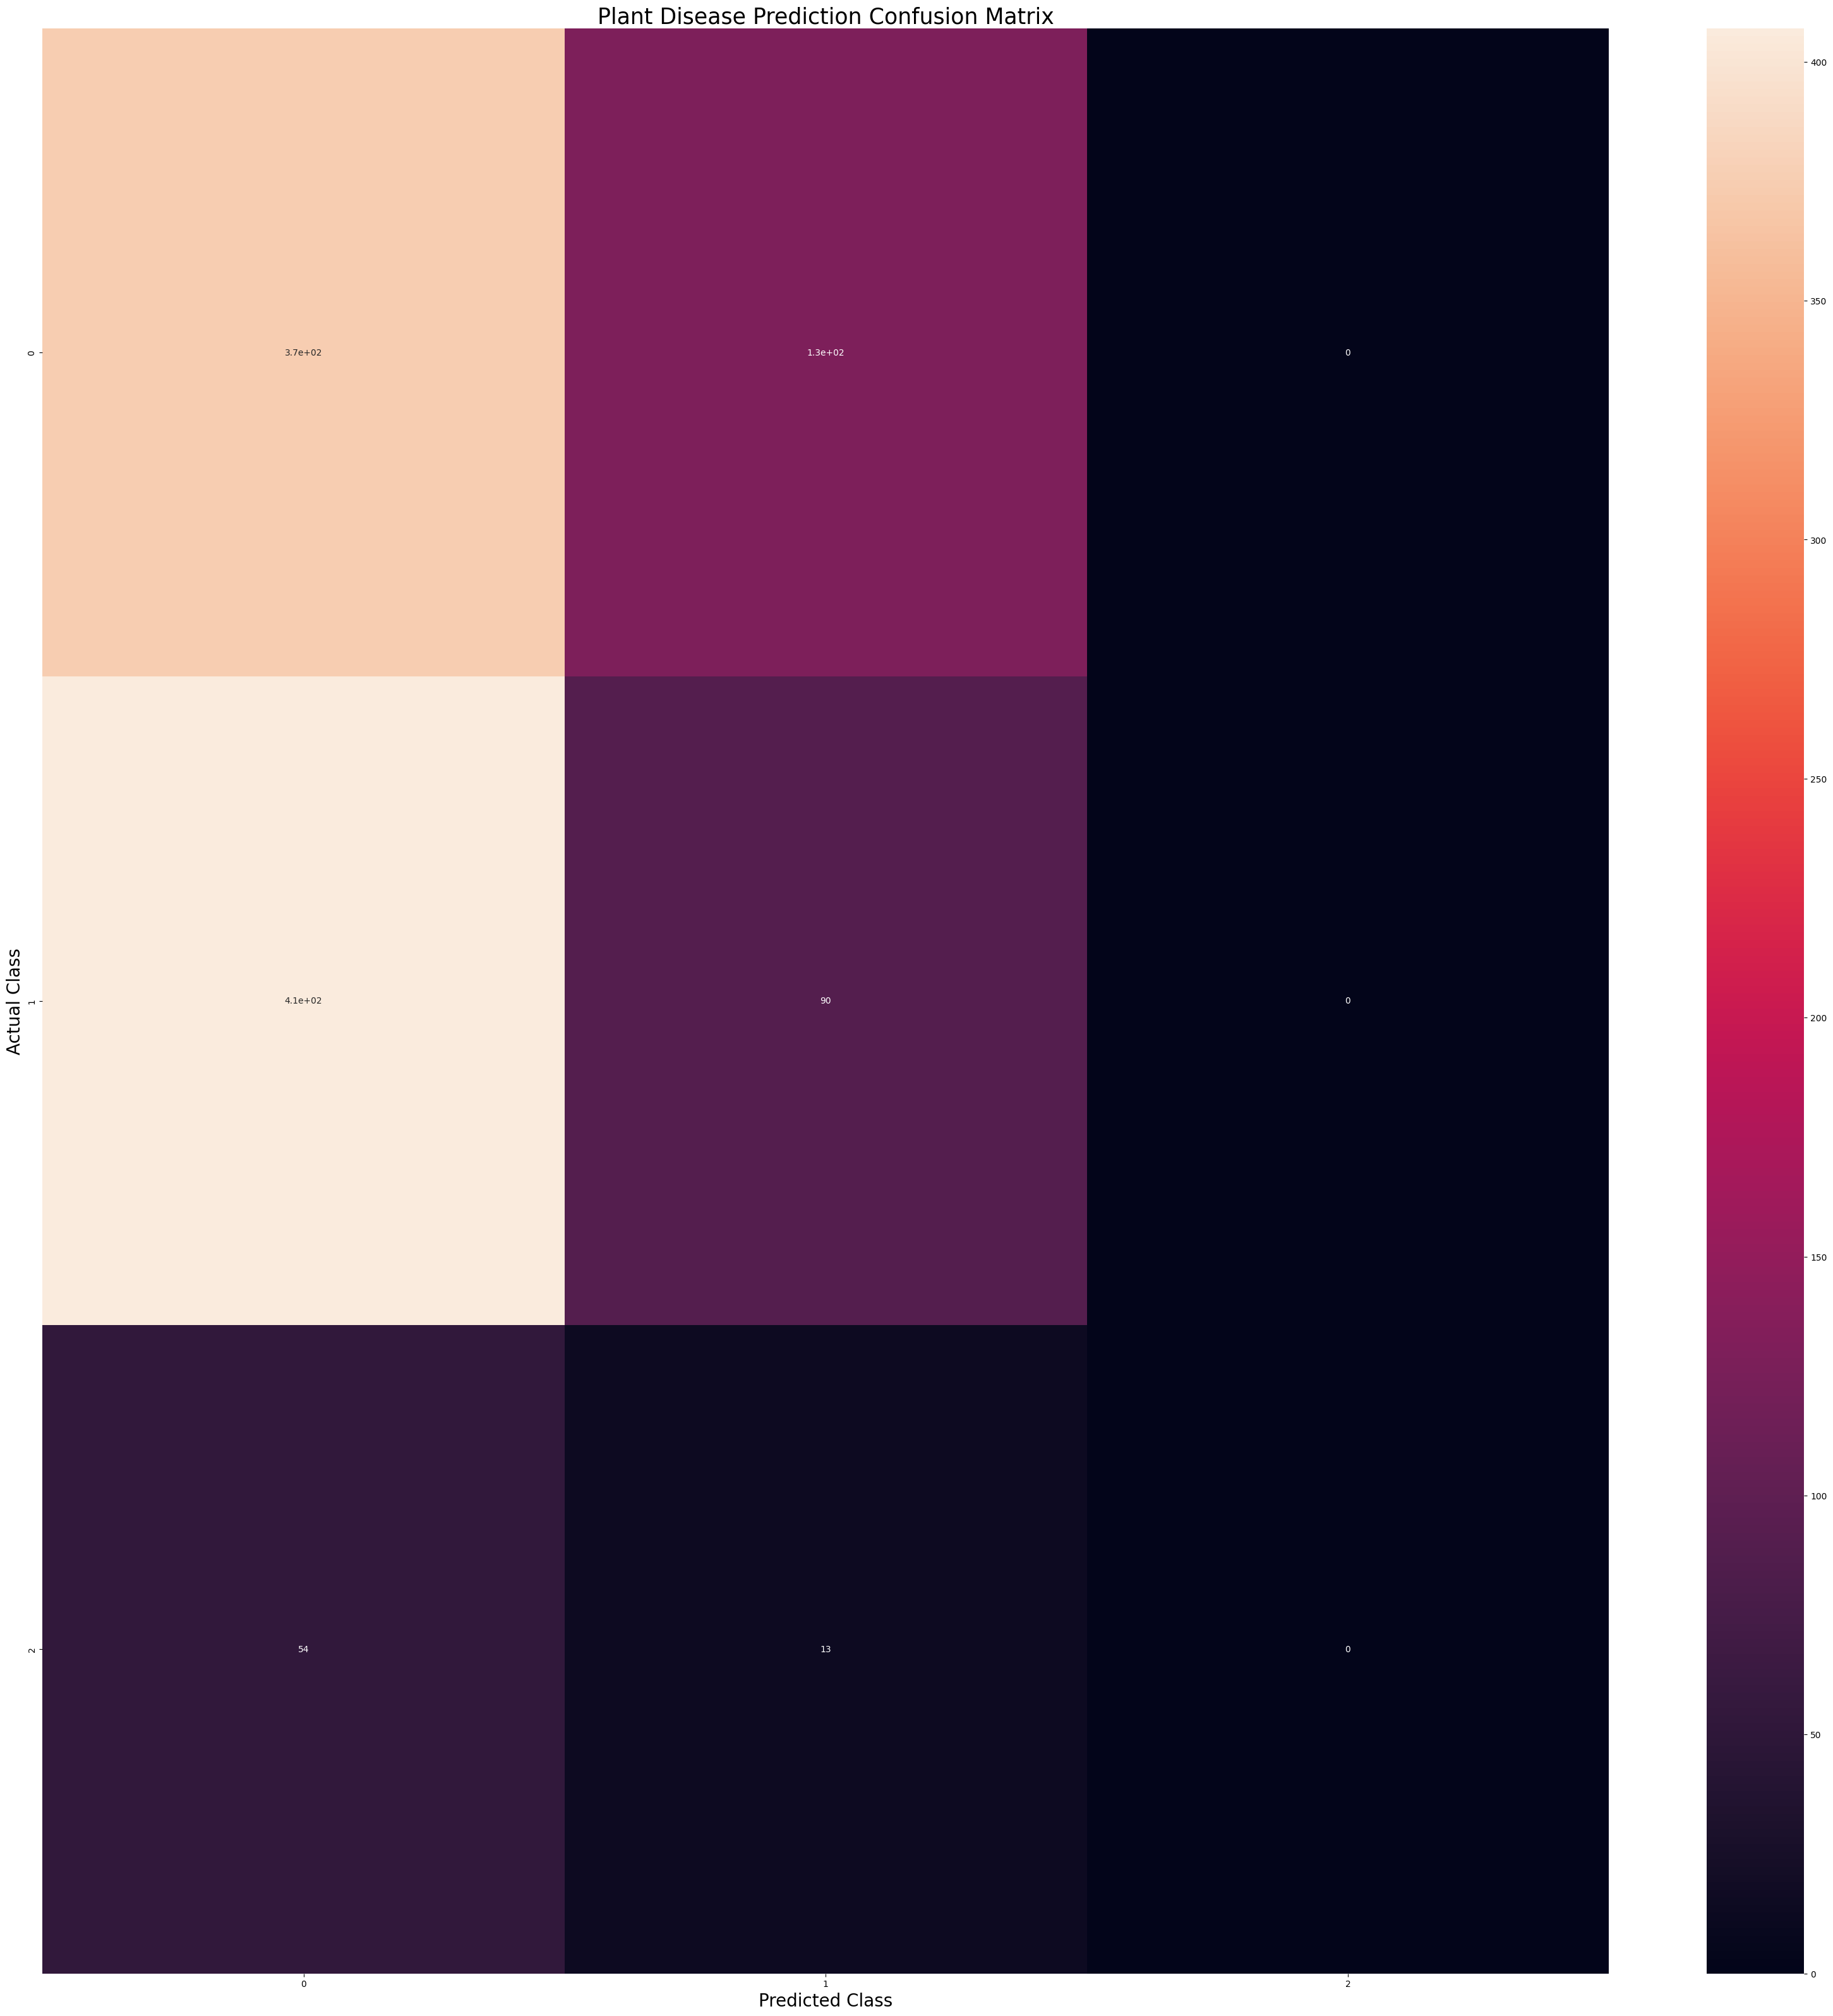

In [150]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()